Εισάγουμε τις βιβλιοθήκες που θα χρησιμοποιήσουμε

In [1]:
# Import necessary libraries
import os
import glob
import time
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

Διαβάζουμε τις συλλογές δεδομένων που θα χρησιμοποιήσουμε. Ειδικότερα παίρνουμε όλα τα .csv αρχεία που υπάρχουν στον φάκελο "new_data" και τα ομαδοποιούμε σε ένα μόνο Dataframe , για μεγαλύτερη ευκολία κατά την διαχειρησή τους.

In [2]:
#assuming we are in Q2 directory , we go to the parent folder
folder_path = os.path.join('..', 'new_data')

# Get all the CSV files from the folder
csv_files = glob.glob(folder_path + '/*.csv')

all_data=[]
# Load each CSV file in one dataframe
for idx,csv_file in enumerate(csv_files):
    # Load the CSV file into a dataframe
    df = pd.read_csv(csv_file)
    
    # Append the DataFrame to the list
    all_data.append(df)

# Combine all data into a single DataFrame
combined_data = pd.concat(all_data)

Ορίζουμε τα features με τα οποία θα γίνει το η εκπαίδευση όπως και το target. Τελος χωρίζουμε και τα δεδομένα μας σε σετ για εκπαίδευση και για testing , με την βοήθεια της συνάρτησης "train_test_split" που διατίθεται στην βιβλιοθήκη της sklearn. 

In [3]:
# Select relevant features and target variable
features = combined_data.drop(['label', 'timestamp'], axis=1).values
target = combined_data['label'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
 

Σε αυτό το σημείο γίνεται η εκπαίδευση ταξινομητή Random Forest και η πρόβλεψη των δεδομένων που είχαμε κρατήσει για testing ,πάλι με την βοήθεια της βιβλιοθήκες sklearn. Μέσα σε αυτή την διαδικασία υπολογίζουμε και τον χρόνο αυτών των διαδικασιών.

In [4]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

start=time.time() #start time of the training

# Train the classifier
rf_classifier.fit(X_train, y_train)

end=time.time() #calculating time
print(f'Training completed in : {end-start}')

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)
print(f'Prediction completed in: {time.time()-end}') 

Training completed in : 83.52809739112854
Prediction completed in: 1.7526133060455322


Όπως και στους υπόλοιπους ταξινομητές , παραθέτουμε 10 παραδείγματα στιγμιοτύπων για πρόβλεψη.

In [5]:
num_samples = 10

# Get 10 random indices from the x_test data set
random_indices = np.random.randint(0, len(X_test), size=num_samples)

for i, random_index in enumerate(random_indices):
    random_sample = X_test[random_index].reshape(1, -1)  # Reshape to match model's expected input shape
    actual_label = y_test[random_index]
    
    # Make the prediction
    predicted_label = rf_classifier.predict(random_sample)
    
    # Display the random sample and the label prediction
    print(f'\nSample {i+1}:')
    print(f'Random Sample Index: {random_index}')
    print(f'Input Features: {random_sample}')
    print(f'Actual Label: {actual_label}')
    print(f'Predicted Label: {predicted_label}')


Sample 1:
Random Sample Index: 84719
Input Features: [[-0.9678 -0.1916  0.1216 -0.997   0.1852 -0.003 ]]
Actual Label: 2
Predicted Label: [5]

Sample 2:
Random Sample Index: 56911
Input Features: [[-9.764e-01  1.252e-01 -1.000e-04 -3.762e-01  1.213e-01  9.244e-01]]
Actual Label: 6
Predicted Label: [6]

Sample 3:
Random Sample Index: 1130
Input Features: [[-0.9931  0.0967  0.0689 -0.972   0.017  -0.2555]]
Actual Label: 5
Predicted Label: [5]

Sample 4:
Random Sample Index: 52593
Input Features: [[-0.7314 -0.0495 -0.0816 -0.1001  0.0358 -0.3291]]
Actual Label: 0
Predicted Label: [0]

Sample 5:
Random Sample Index: 62341
Input Features: [[-0.5686 -0.5364 -1.123   1.7944 -0.554   3.9431]]
Actual Label: 1
Predicted Label: [1]

Sample 6:
Random Sample Index: 35881
Input Features: [[-0.6429  0.026  -0.7664 -0.228   0.0581  0.9719]]
Actual Label: 6
Predicted Label: [6]

Sample 7:
Random Sample Index: 34300
Input Features: [[-0.9755 -0.1414  0.0934 -0.1279  0.2663  0.9548]]
Actual Label: 6
Pre

In [6]:
# 10-Fold Cross validation
print(np.mean(cross_val_score(rf_classifier, X_train[::10], y_train[::10], cv=10, n_jobs=2)))

0.9880638967689016


Παραπάτω βλέπουμε την αξιολόγηση του ταξινόμητή μας μέσω συναρτήσεων που εχουν οριστεί στο αρχείο evaluation.py. Βλέπουμε τις τιμές της ακρίβειας , ανακλησης , f1-score , accuracy, confusion matrix και τέλος την καμπύλη του ROC. 

In [7]:
from evaluation import general_evaluation

general_evaluation(y_test,y_pred)

Accuracy: 0.99

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     24235
           1       1.00      1.00      1.00      5758
           2       0.90      0.90      0.90      5057
           3       0.97      0.97      0.97      1533
           4       0.95      0.96      0.96      1381
           5       0.97      0.97      0.97     14826
           6       1.00      1.00      1.00     57972
           7       1.00      1.00      1.00      8523
           8       1.00      1.00      1.00      7848
           9       0.99      0.99      0.99      1105
          10       0.97      0.98      0.98       841
          11       1.00      0.98      0.99       150

    accuracy                           0.99    129229
   macro avg       0.98      0.98      0.98    129229
weighted avg       0.99      0.99      0.99    129229

Confusion Matrix:
[[23936     8   127    25    39    83    14     1     2     0     0     0]


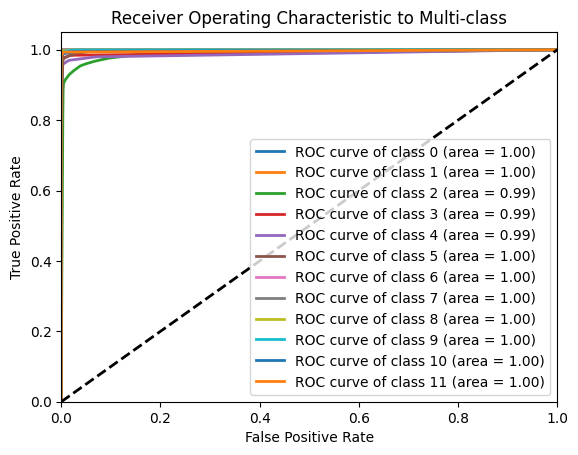

In [8]:
from evaluation import get_roc_curve

get_roc_curve(rf_classifier,X_test,y_test)